In [193]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment5 as im
import imagetools as im0
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Spectral Analysis
## Question 1

The bright spots are at multiples of 16 along the vertical axis, this is the frequency of the sine wave in the j direction. Their amplitude grows smaller as we get further from the origin

In [194]:
n = 256
i = np.arange(n)
j = np.pi / 16 * np.ones(n)
x = np.sin(np.outer(i, j))

<IPython.core.display.Javascript object>


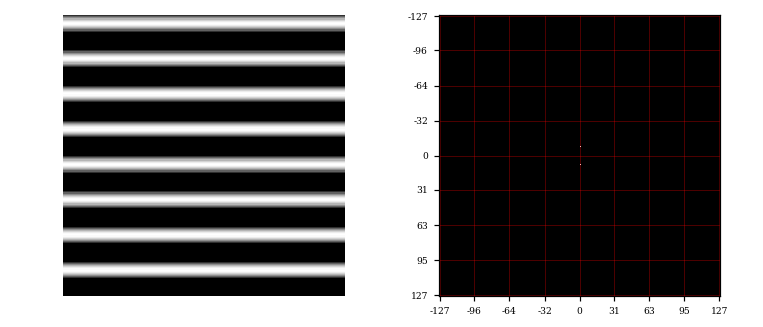

In [195]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im0.show(x, ax=axes[0])
im0.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

## Question 2

<IPython.core.display.Javascript object>


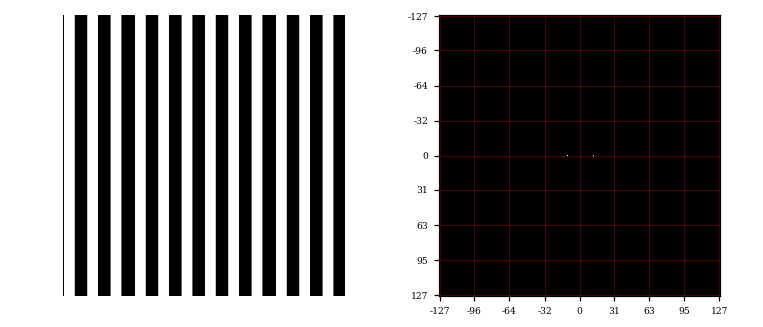

In [196]:
i2 = 2 * np.pi * 3 / 64 * np.ones(n)
j2 = np.arange(n)
x = 4 * np.sin(np.outer(i2, j2))

def plot_transform(x):
    fig, axes = plt.subplots(ncols=2, figsize=(7,3))
    im0.show(x, ax=axes[0])
    im0.showfft(x, ax=axes[1], apply_fft=True)
    fig.show()
plot_transform(x)

<IPython.core.display.Javascript object>


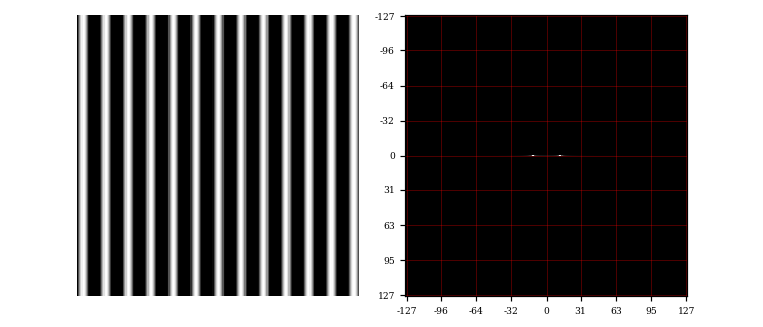

In [18]:
i3 = 2 * np.pi * (3 + 1/8) / 64 * np.ones(256)
x = np.sin(np.outer(i3, j2))
plot_transform(x)

<IPython.core.display.Javascript object>


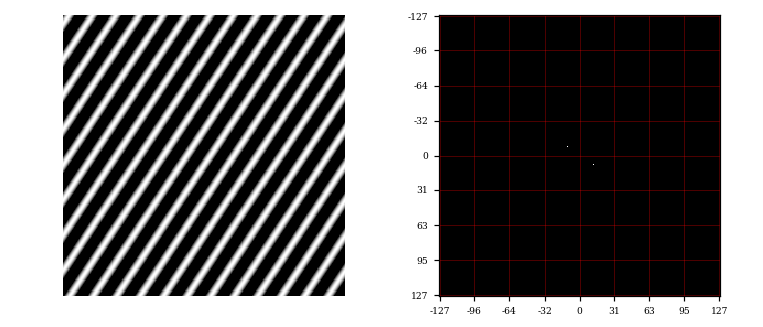

In [197]:
x = np.sin(np.outer(i, j) + np.outer(i2, j2))
plot_transform(x)

<IPython.core.display.Javascript object>


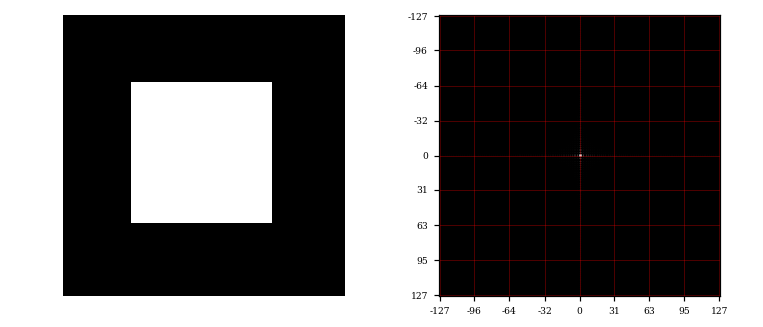

In [20]:
x = np.zeros((256, 256))
x[62:190, 62:190] = 1
plot_transform(x)

<IPython.core.display.Javascript object>


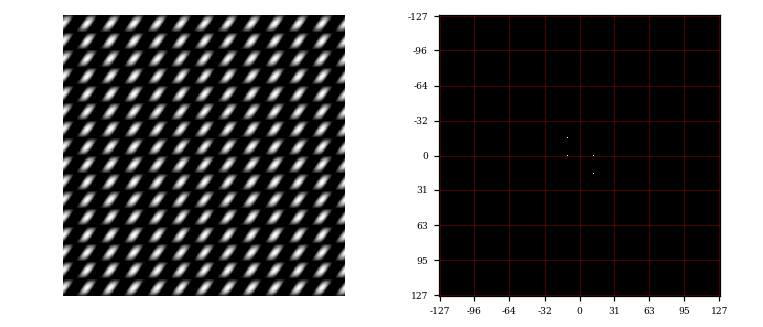

In [198]:
x = x * np.sin(np.outer(i, j))
plot_transform(x)

## Question 3

In [199]:
def plot_transform_im(x):
    fig, axes = plt.subplots(ncols=2, figsize=(7,3))
    im0.show(x, ax=axes[0])
    im0.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
    fig.show()

<IPython.core.display.Javascript object>


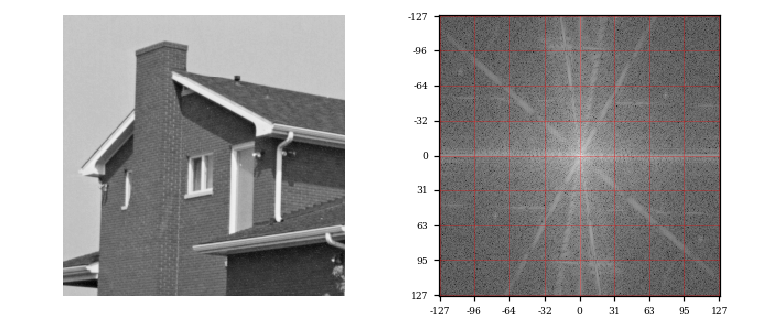

In [200]:
x = plt.imread('assets/house.png')
plot_transform_im(x)

The structures represent the edges in the image and their direction corresponds to the direction of the edge.

<IPython.core.display.Javascript object>


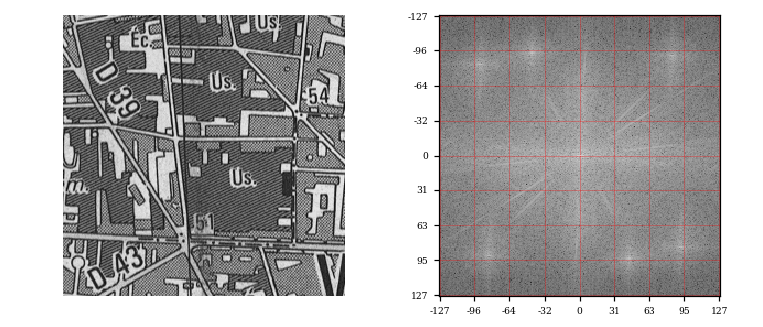

In [201]:
y = plt.imread('assets/map.png')
plot_transform_im(y)


<IPython.core.display.Javascript object>


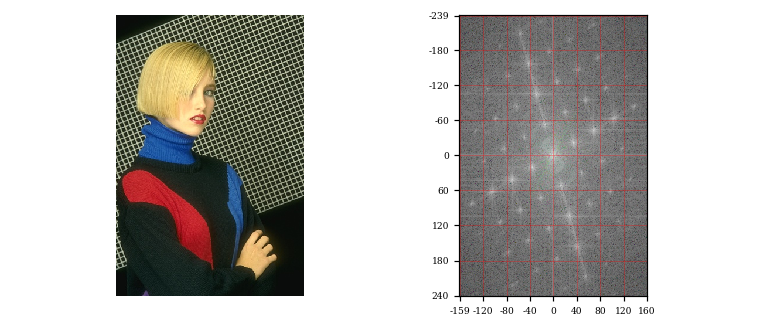

In [27]:
z = plt.imread('assets/lady.png')
plot_transform_im(z)

<IPython.core.display.Javascript object>


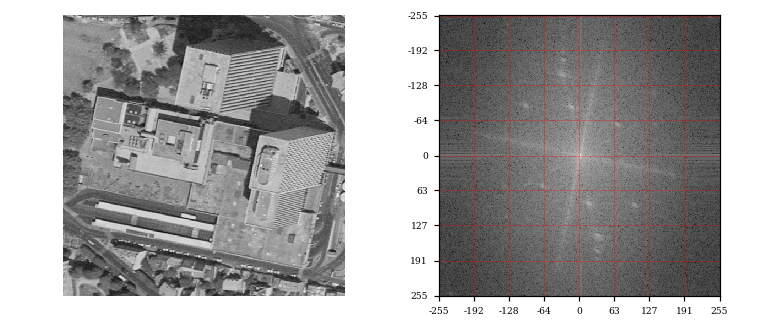

In [202]:
w = plt.imread('assets/montreuil.png')
plot_transform_im(w)

## Question 5
How does aliasing affect these images

In [203]:
def sub_sample(x, factor=2):
    x = x[::factor, ::factor]
    return x

<IPython.core.display.Javascript object>


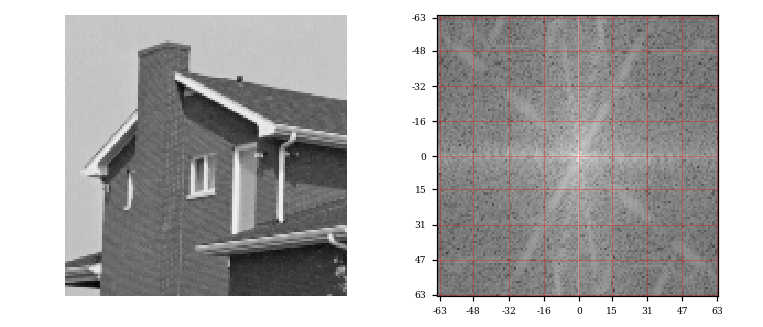

In [204]:
x_2 = sub_sample(x,2)
plot_transform_im(x_2)

<IPython.core.display.Javascript object>


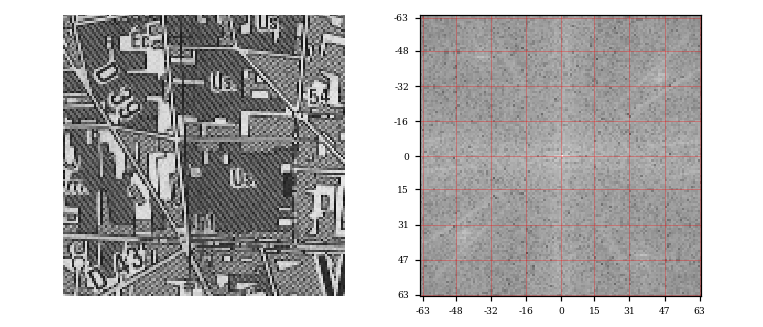

In [46]:
y_2 = sub_sample(y,2)
plot_transform_im(y_2)

<IPython.core.display.Javascript object>


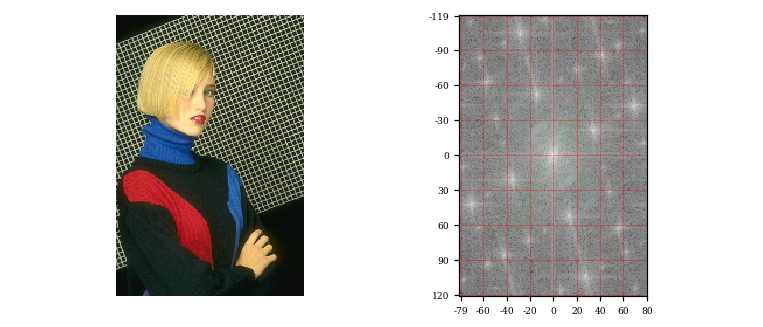

In [205]:
z_2 = sub_sample(z,2)
plot_transform_im(z_2)

<IPython.core.display.Javascript object>


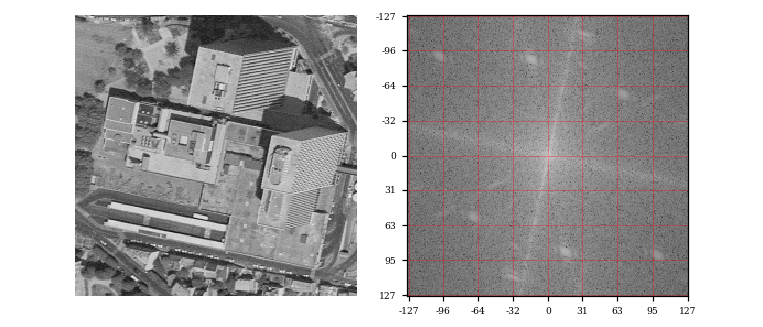

In [50]:
w_2 = sub_sample(w,2)
plot_transform_im(w_2)

# 2 Spectral Convolution

## Question 6

A gausssian has an fft that that is gaussian and therefore acts as a low pass filter.

<IPython.core.display.Javascript object>


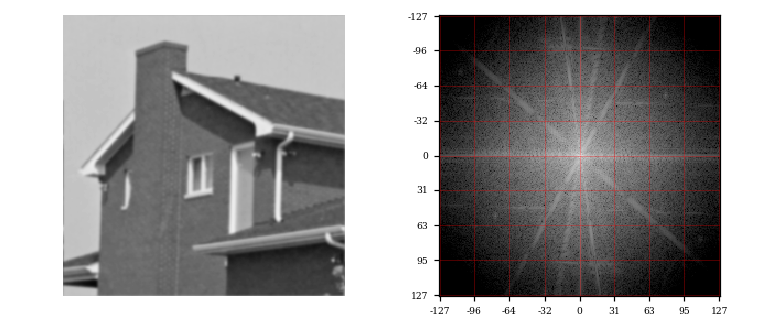

In [206]:
kern_gauss = im.kernel(name = 'gaussian', tau =2)
conv_x = im.convolve(x, kern_gauss, boundary='periodical', separable=None)
plot_transform_im(conv_x)

## Question 7

<IPython.core.display.Javascript object>


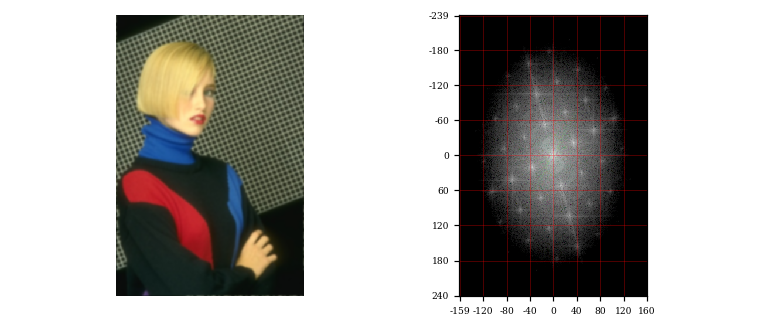

In [377]:
kern_gauss = im.kernel(name = 'gaussian', tau =5)
conv_x = im.convolve(z, kern_gauss, boundary='periodical', separable=None)
plot_transform_im(conv_x)

## Question 8

In [318]:
def kernel2fft(nu, n1, n2, separable=None):
    #create an array of zeros
    if separable is None:
        tmp = np.zeros((n1,n2))
        s1 = int((nu.shape[0] - 1) / 2)
        s2 = int((nu.shape[1] - 1) / 2)
        tmp[:s1+1, :s2+1] = nu[s1:2*s1+1, s2:2*s2+1]
        tmp[:s1+1, -s2:] = nu[s1:2*s1+1, :s2]
        tmp[-s1:,:s2+1] = nu[:s1,s2:2*s2+1]
        tmp[-s1:,-s2:] = nu[:s1,:s2]
        

        lbd = np.fft.fft2(tmp)
        
    return lbd

In [209]:

n1, n2 = z.shape[0:2]
lambd =kernel2fft(kern_gauss,n1,n2)



## Question 9

In [355]:
def convolvefft(x, lbd):
    if np.ndim(x) == 3:
        x_fft = (np.fft.fft2(x,axes = (0,1,2))) 
        x_conv = (x_fft.T*lbd.T).T

        x_conv_inv = np.real(np.fft.ifft2(x_conv, axes=(0,1,2)))
    else:
        x_fft = (np.fft.fft2(x,axes = (0,1))) 
        x_conv = (x_fft.T*lbd.T).T

        x_conv_inv = np.real(np.fft.ifft2(x_conv, axes=(0,1)))
        
    return np.abs(x_conv_inv)

## Question 10

<IPython.core.display.Javascript object>


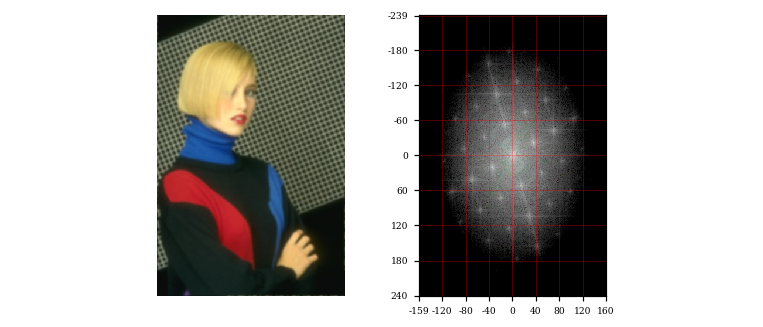

In [378]:
n1, n2 = z.shape[0:2]

lambd =kernel2fft(kern_gauss,n1,n2)

conv_xfft = convolvefft(z,lambd)
plot_transform_im(conv_xfft)

In [376]:
np.allclose(conv_x,conv_xfft)

True

## Question 11


In [465]:
#using an exponential kernel

kern_tau = np.arange(0.3,4.3,0.5)
t_spatial = np.zeros_like(kern_tau)
for i in range(kern_tau.shape[0]):
    kern_gauss = im.kernel(name = 'exponential', tau =(kern_tau[i]))
    
    #compute spatial convolution 100 times
    t1 = time.time()
    for j in range(100):
        conv_x = im.convolve(z, kern_gauss, boundary='periodical', separable=None)    
    t2 = time.time()
    t_spatial[i] = t2-t1

(5, 5)
(11, 11)
(17, 17)
(25, 25)
(31, 31)
(39, 39)
(45, 45)
(53, 53)


In [475]:
kern_tau = np.arange(0.3,4.3,0.5)
t_spectral = np.zeros_like(kern_tau)
for i in range(kern_tau.shape[0]):
    kern_gauss = im.kernel(name = 'exponential', tau =(kern_tau[i]))

    print(kern_gauss.shape)
    #compute spatial convolution 100 times
    t1 = time.time()
    for j in range(100):
        n1, n2 = z.shape[0:2]
        lambd =kernel2fft(kern_gauss,n1,n2)
        conv_xfft = convolvefft(z,lambd)    
    t2 = time.time()
    t_spectral[i] = t2-t1

(5, 5)
(11, 11)
(17, 17)
(25, 25)
(31, 31)
(39, 39)
(45, 45)
(53, 53)


<IPython.core.display.Javascript object>


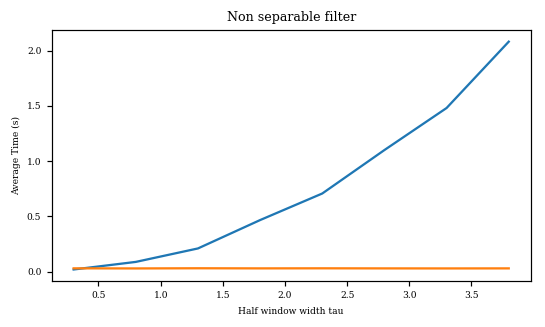

In [486]:
plt.figure()
plt.plot(kern_tau,t_spatial/100)#4

In [487]:
plt.plot(kern_tau,t_spectral/100)#70
plt.title('Non separable filter')
plt.xlabel('Half window width tau')
plt.ylabel('Average Time (s)')

Text(5.39394,0.5,'Average Time (s)')

In [489]:
#using a separable kernel

kern_tau = np.arange(0.3,4.3,0.5)
t_spatial_sep = np.zeros_like(kern_tau)
for i in range(kern_tau.shape[0]):
    

    #compute spatial convolution 100 times
    t1 = time.time()
    print(i)
    for j in range(100):
        nu1   = im.kernel('gaussian1', tau =(kern_tau[i]))
        nu2   = im.kernel('gaussian2', tau =(kern_tau[i]))
        nu    = ( nu1, nu2 )
        xconv = im.convolve(z, nu, boundary='mirror', separable='product')
                
    t2 = time.time()
    t_spatial_sep[i] = t2-t1

0
1
2
3
4
5
6
7


<IPython.core.display.Javascript object>


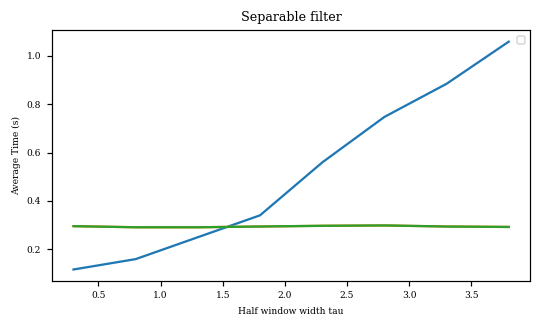

In [511]:
plt.figure()
line1=plt.plot(kern_tau,t_spatial_sep/10)#2

In [493]:
kern_tau = np.arange(0.3,4.3,0.5)
t_spectral_sep = np.zeros_like(kern_tau)
for i in range(kern_tau.shape[0]):
    kern_gauss = im.kernel(name = 'gaussian', tau =(kern_tau[i]))

    print(kern_gauss.shape)
    #compute spatial convolution 100 times
    t1 = time.time()
    for j in range(10):
        n1, n2 = z.shape[0:2]
        lambd =kernel2fft(kern_gauss,n1,n2)
        conv_xfft = convolvefft(z,lambd)    
    t2 = time.time()
    t_spectral_sep[i] = t2-t1

(3, 3)
(5, 5)
(9, 9)
(13, 13)
(17, 17)
(21, 21)
(25, 25)
(29, 29)


In [513]:
line2=plt.plot(kern_tau,t_spectral_sep/10)#5
plt.title('Separable filter')
plt.xlabel('Half window width tau')
plt.ylabel('Average Time (s)')
plt.legend((line1, line2), ('Spatial', 'Spectral'))

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f33a81ce320>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f3396ab79b0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


What are the complexities?
Separable: $O(sn)$
Non separable: $O(s^2n)$
and for Spectral filtering: $O(nlogn)$
Spectral convolution is more favourable for larger values of tau that result in larger filters. As it is independent of filter size


# 3 Adjoint

## Question 12

In [293]:
def kernel(name, tau):
    
    eps=1e-3
    if name is 'motion':
        nu = np.load('assets/motionblur.npy')
    if name is 'grad1_forward':
        nu = np.zeros((3, 1))
        nu[1, 0] = -1
        nu[2, 0] = 1
    if name is 'grad2_forward':
        nu = np.zeros((1, 3))
        nu[0, 1] = -1
        nu[0, 2] = 1
    if name is 'grad1_backward':
        nu = np.zeros((3, 1))
        nu[0, 0] = -1
        nu[1, 0] = 1
    if name is 'grad2_backward':
        nu = np.zeros((1, 3))
        nu[0, 0] = -1
        nu[0, 1] = 1
    if name is 'laplacian1':
        nu = np.zeros((3, 1))
        nu[0, 0] = 1
        nu[1, 0] = -2
        nu[2, 0] = 1
        return nu
    if name is 'laplacian2':
        nu = np.zeros((1, 3))
        nu[0, 0] = 1
        nu[0, 1] = -2
        nu[0, 2] = 1
        return nu
    
    if name.startswith('gauss'):
        i =0
        while (np.exp(-(i**2)/(2*tau**2)) >eps):
            i+=1

        ny =i-1
        #points in the range
        j = np.arange(-ny, ny+1, 1)

        f_ij = np.exp(-(j**2)/(2*tau**2))
        
    if name.startswith('exp'):
        i =0
        while (np.exp(-np.sqrt((i**2))/(tau)) >eps):
            i+=1
            
        ny =i-1
        #points in the range
        j = np.arange(-ny, ny+1, 1)

        f_ij = np.exp(np.sqrt(j**2)/-tau)
        
        
    if name.startswith('box'):
        s1 =s2=np.floor(tau)
        i,j = np.meshgrid(np.arange(-s1,s1+1),np.arange(-s2,s2+1),indexing='ij')
        f_ij =np.maximum(np.abs(i),np.abs(j)) <=tau
        nux = x[::2, ::2] = f_ij/f_ij.sum()
        
    if name.endswith('1'):
        sh = f_ij.shape[0]
        f_ij = f_ij.reshape(sh,1)
        Z =np.sum(f_ij)
        nu = (1/Z)*f_ij
        
    if name.endswith('2'):
        sh = f_ij.shape[0]
        f_ij = f_ij.reshape(1,sh)
        Z =np.sum(f_ij)
        nu = (1/Z)*f_ij
        
    if name is 'gaussian':
        i =0
        while (np.exp(-(i**2)/(2*tau**2)) >eps):
            i+=1

        ny =i-1
        nx = i-1
        #points in the range
        i = np.arange(-nx,nx+1,1)
        j = np.arange(-ny, ny+1, 1)
        
        xx,yy = np.meshgrid(i,j)
        f_ij = np.exp(-(xx**2+yy**2)/(tau))
        
        nu = f_ij/f_ij.sum()
        
    if name is 'exponential':
        i =0
        while (np.exp(-np.sqrt((i**2))/(tau)) >eps):
            i+=1

        ny =i-1
        nx = i-1
        #points in the range
        i = np.arange(-nx,nx+1,1)
        j = np.arange(-ny, ny+1, 1)
        
        xx,yy = np.meshgrid(i,j)
        f_ij = np.exp(-np.sqrt((xx**2+yy**2))/(tau))
        
        nu = f_ij/f_ij.sum()
                
        

    return nu

## Question 13
$\mu$ is a spatially flipped version of $\nu$

<IPython.core.display.Javascript object>


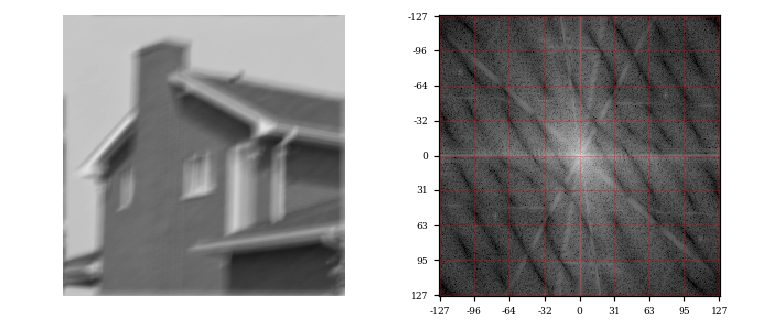

In [459]:
kern_mot = kernel(name = 'motion', tau =5)
conv_x = im.convolve(x, kern_mot, boundary='periodical', separable=None)
plot_transform_im(conv_x)

<IPython.core.display.Javascript object>


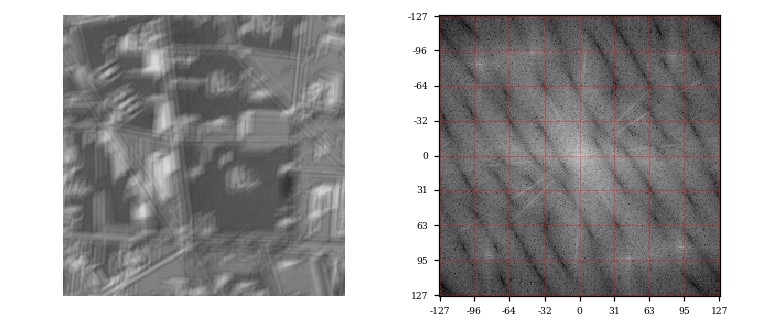

In [458]:
kern_mot_t = np.flip(np.flip(kern_mot,0),1)
conv_x_t = im.convolve(y, kern_mot_t, boundary='periodical', separable=None)
plot_transform_im(conv_x_t)

In [460]:
rhs = np.sum(conv_x*y)
lhs = np.sum(conv_x_t*x)
print(rhs,lhs)

15473.171964239793 15473.171985733145


In [461]:
np.allclose(rhs,lhs)

True

## Question 15
$\mu$ is a complex conjugate version of $\nu$ in the frequency domain. Is the element-wise complex conjugate, since we have already flipped the kernel

<IPython.core.display.Javascript object>


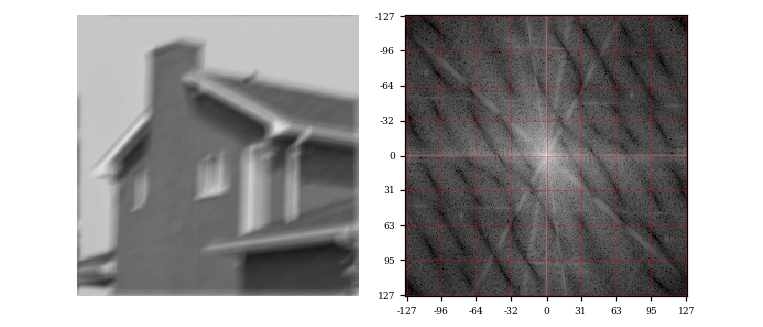

In [413]:
n1, n2 = x.shape[0:2]

lambd =kernel2fft(kern_mot,n1,n2)

conv_xfft = convolvefft(x,lambd)
plot_transform_im(conv_xfft)

<IPython.core.display.Javascript object>


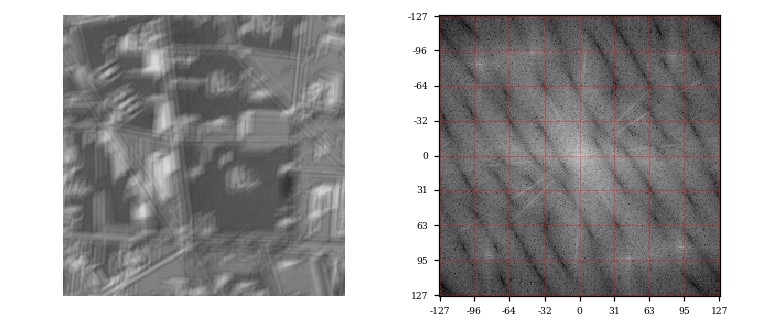

In [452]:
conv_xfft_t = convolvefft(y,np.conj((lambd)))
plot_transform_im(conv_xfft_t)

In [406]:
rhs = np.sum(conv_xfft*y)
lhs = np.sum(conv_xfft_t*x)
print(rhs,lhs)

15473.171941717272 15473.171941717272


In [415]:
rhs = np.sum(conv_xfft*y)
lhs = np.sum(conv_xfft_t*x)
print(rhs,lhs)
np.allclose(rhs,lhs)

15473.171941717272 15473.171941717272


True

In [463]:
np.allclose(conv_xfft_t,conv_x_t)

True